In [128]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Especificando cada caminho

In [129]:
dataset = 'model/rotation_history_classifier/rotation_history.csv'
model_save_path = 'model/rotation_history_classifier/rotation_history_classifier.keras'

# Número de Rotações Classificadas

In [1]:
NUM_CLASSES = 3
TIME_STEPS = 16
DIMENSION = 2

# Carregar dados de aprendizagem

In [132]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))

In [133]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Construindo modelo

In [135]:
use_lstm = False
model = None

if use_lstm:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION, )), 
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION]),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

/home/rafaella/.local/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [136]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_12 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 24)             │           792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,064 (4.16 KB)

 Trainable params: 1,064 (4.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Treinamento do Modelo

In [116]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 557ms/step - accuracy: 0.3750 - loss: 0.7026
Epoch 1: saving model to model/rotation_history_classifier/rotation_history_classifier.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - accuracy: 0.3719 - loss: 0.7030 - val_accuracy: 0.5000 - val_loss: 0.6925
Epoch 2/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4453 - loss: 0.6953
Epoch 2: saving model to model/rotation_history_classifier/rotation_history_classifier.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4398 - loss: 0.6957 - val_accuracy: 0.6087 - val_loss: 0.6878
Epoch 3/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5781 - loss: 0.6901
Epoch 3: saving model to model/rotation_history_classifier/rotation_history_classifier.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5878 - loss: 0.6896 - val_accuracy: 0.6522 - val_loss: 0.6841
Epoch 4/1000
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5703 - loss: 0.6862
Epoch 4: saving model to model/rotati

In [ ]:
model = tf.keras.models.load_model(model_save_path)

In [ ]:
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
[0.7998216  0.20017844]
0


# Matriz de confusão

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


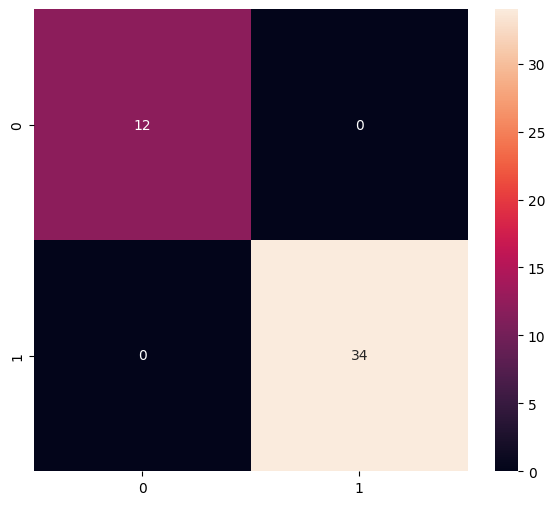

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        34

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46



In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite

In [ ]:
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

In [121]:
tflite_save_path = 'model/rotation_history_classifier/rotation_history_classifier.tflite'

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmpl7ujls7y/assets


INFO:tensorflow:Assets written to: /tmp/tmpl7ujls7y/assets


Saved artifact at '/tmp/tmpl7ujls7y'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32), dtype=tf.float32, name='input_layer_5')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  140488381665648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140488381669520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140488381676032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140488381675856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140488381745984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140488381748800: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1728041138.927759    8295 tf_tfl_flatbuffer_helpers.cc:392] Ignored output_format.
W0000 00:00:1728041138.927774    8295 tf_tfl_flatbuffer_helpers.cc:395] Ignored drop_control_dependency.
2024-10-04 08:25:38.927938: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmpl7ujls7y
2024-10-04 08:25:38.928360: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2024-10-04 08:25:38.928370: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmpl7ujls7y
2024-10-04 08:25:38.932030: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2024-10-04 08:25:38.958303: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmpl7ujls7y
2024-10-04 08:25:38.965698: I tensorflow/cc/saved_model/loader.cc:462] SavedModel load for tags { serve }; Status: success: OK. Took 37762 microseconds.


6356

# Teste de raciocínio

In [123]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [ ]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'serving_default_input_layer_5:0', 'index': 0, 'shape': array([ 1, 32], dtype=int32), 'shape_signature': array([-1, 32], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [125]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [ ]:
%%time
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 69 µs, sys: 4 µs, total: 73 µs
Wall time: 60.6 µs


In [127]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.7998216  0.20017844]
0
